## 生体信号処理[知覚]
知覚のゲームから、反応可能な知覚の閾値を最尤推定によって求める。        
知覚強度xに対応する精度確率をロジットモデルに当てはめ、そのパラメータ beta0, beta1 を事後確率を最大にすることから決定する。

In [18]:
%matplotlib inline
import glob
files_dir = glob.glob('./vp/*.dat')
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import fmin

In [22]:
def get_threshold(file):
    print("file:", file)
    xs = [-10-4.1*i for i in range(10)]
    dic = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0 ,7:0, 8:0, 9:0, 10:0}
    N = 10
    
    # 正答回数をtsvファイルからロード
    with open(file, 'r') as f:
        for l in f:
            ls = l.split()
            strongness = float(ls[2])  #視覚強度
            is_correct = ls[4] #正答ラベリング
            if is_correct=='1':
                for i in range(10):
                    if strongness > -10-4.1*(i+1):
                        dic[i+1] += 1
                        break
    
    # 最尤推定
    def nCr(n,r):
        return math.factorial(n) / math.factorial(n-r) / math.factorial(r)
    
    def calc_log_p(n, x, b_0, b_1):
        s = b_0+b_1*x
        return np.log(nCr(N,n))+n*s-N*(np.log(1+np.exp(s)))

    def calc_target(ns, xs, b_0, b_1):
        ret = 0
        for n, x in zip(ns, xs):
            _p = calc_log_p(n, x, b_0, b_1)
            ret -= _p
        return ret

    def fun(x):
        return calc_target(ns, xs, x[0], x[1])
    
    ns = dic.values()
    b = fmin(fun, [1, 1])
    print("正答回数", ns)
    print("beta: ", b)
    
    # ロジットモデルにあてはめ確率をplot
    ps = []
    for x in xs:
        s = b[0]+b[1]*x
        _p = np.exp(s) / (1+np.exp(s))
        ps.append(_p)
    
    plt.xlabel("Strongness[dB]")
    plt.ylabel("Accuracy")
    plt.plot(xs, ps)
    plt.show()
    
    
    print("75%threshold: ", (np.log(3)-b[0])/b[1])

file: ./vp/fuk_arakawa.dat
Optimization terminated successfully.
         Current function value: 8.067377
         Iterations: 73
         Function evaluations: 138
正答回数 dict_values([10, 10, 10, 10, 10, 9, 9, 5, 6, 4])
beta:  [ 8.64183695  0.19921196]


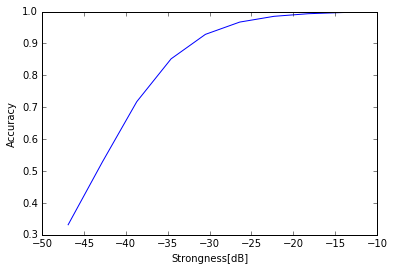

75%threshold:  -37.8653197946


In [21]:
get_threshold(files_dir[0])